In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

Source:

Original Owner:

R. K. Bock
Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
http://wwwmagic.mppmu.mpg.de
rkb '@' mail.cern.ch

Donor:

P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

Initial Look at the Dataset

In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(r'magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [ ]:
df.nunique()

fLength     18643
fWidth      18200
fSize        7228
fConc        6410
fConc1       4421
fAsym       18704
fM3Long     18693
fM3Trans    18390
fAlpha      17981
fDist       18437
class           2
dtype: int64

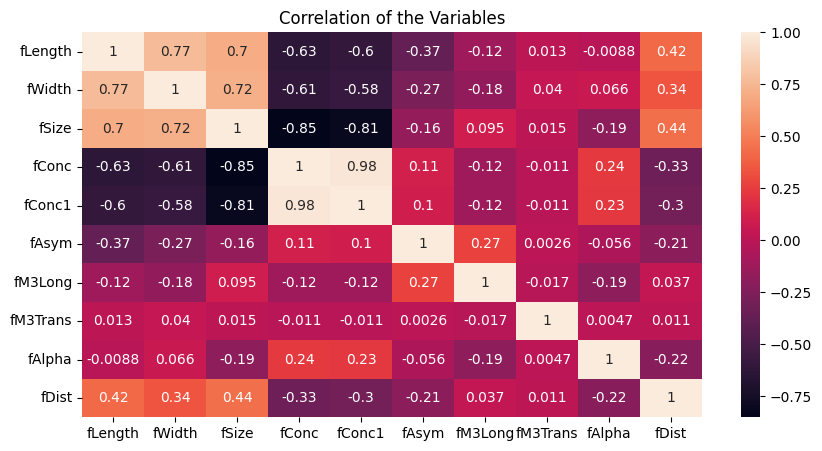

In [ ]:
num_df = df.select_dtypes(['float', 'int'])

fig, axs = plt.subplots(figsize = (10,5))
sns.heatmap(num_df.corr(), annot=True)
plt.title('Correlation of the Variables')
plt.show()

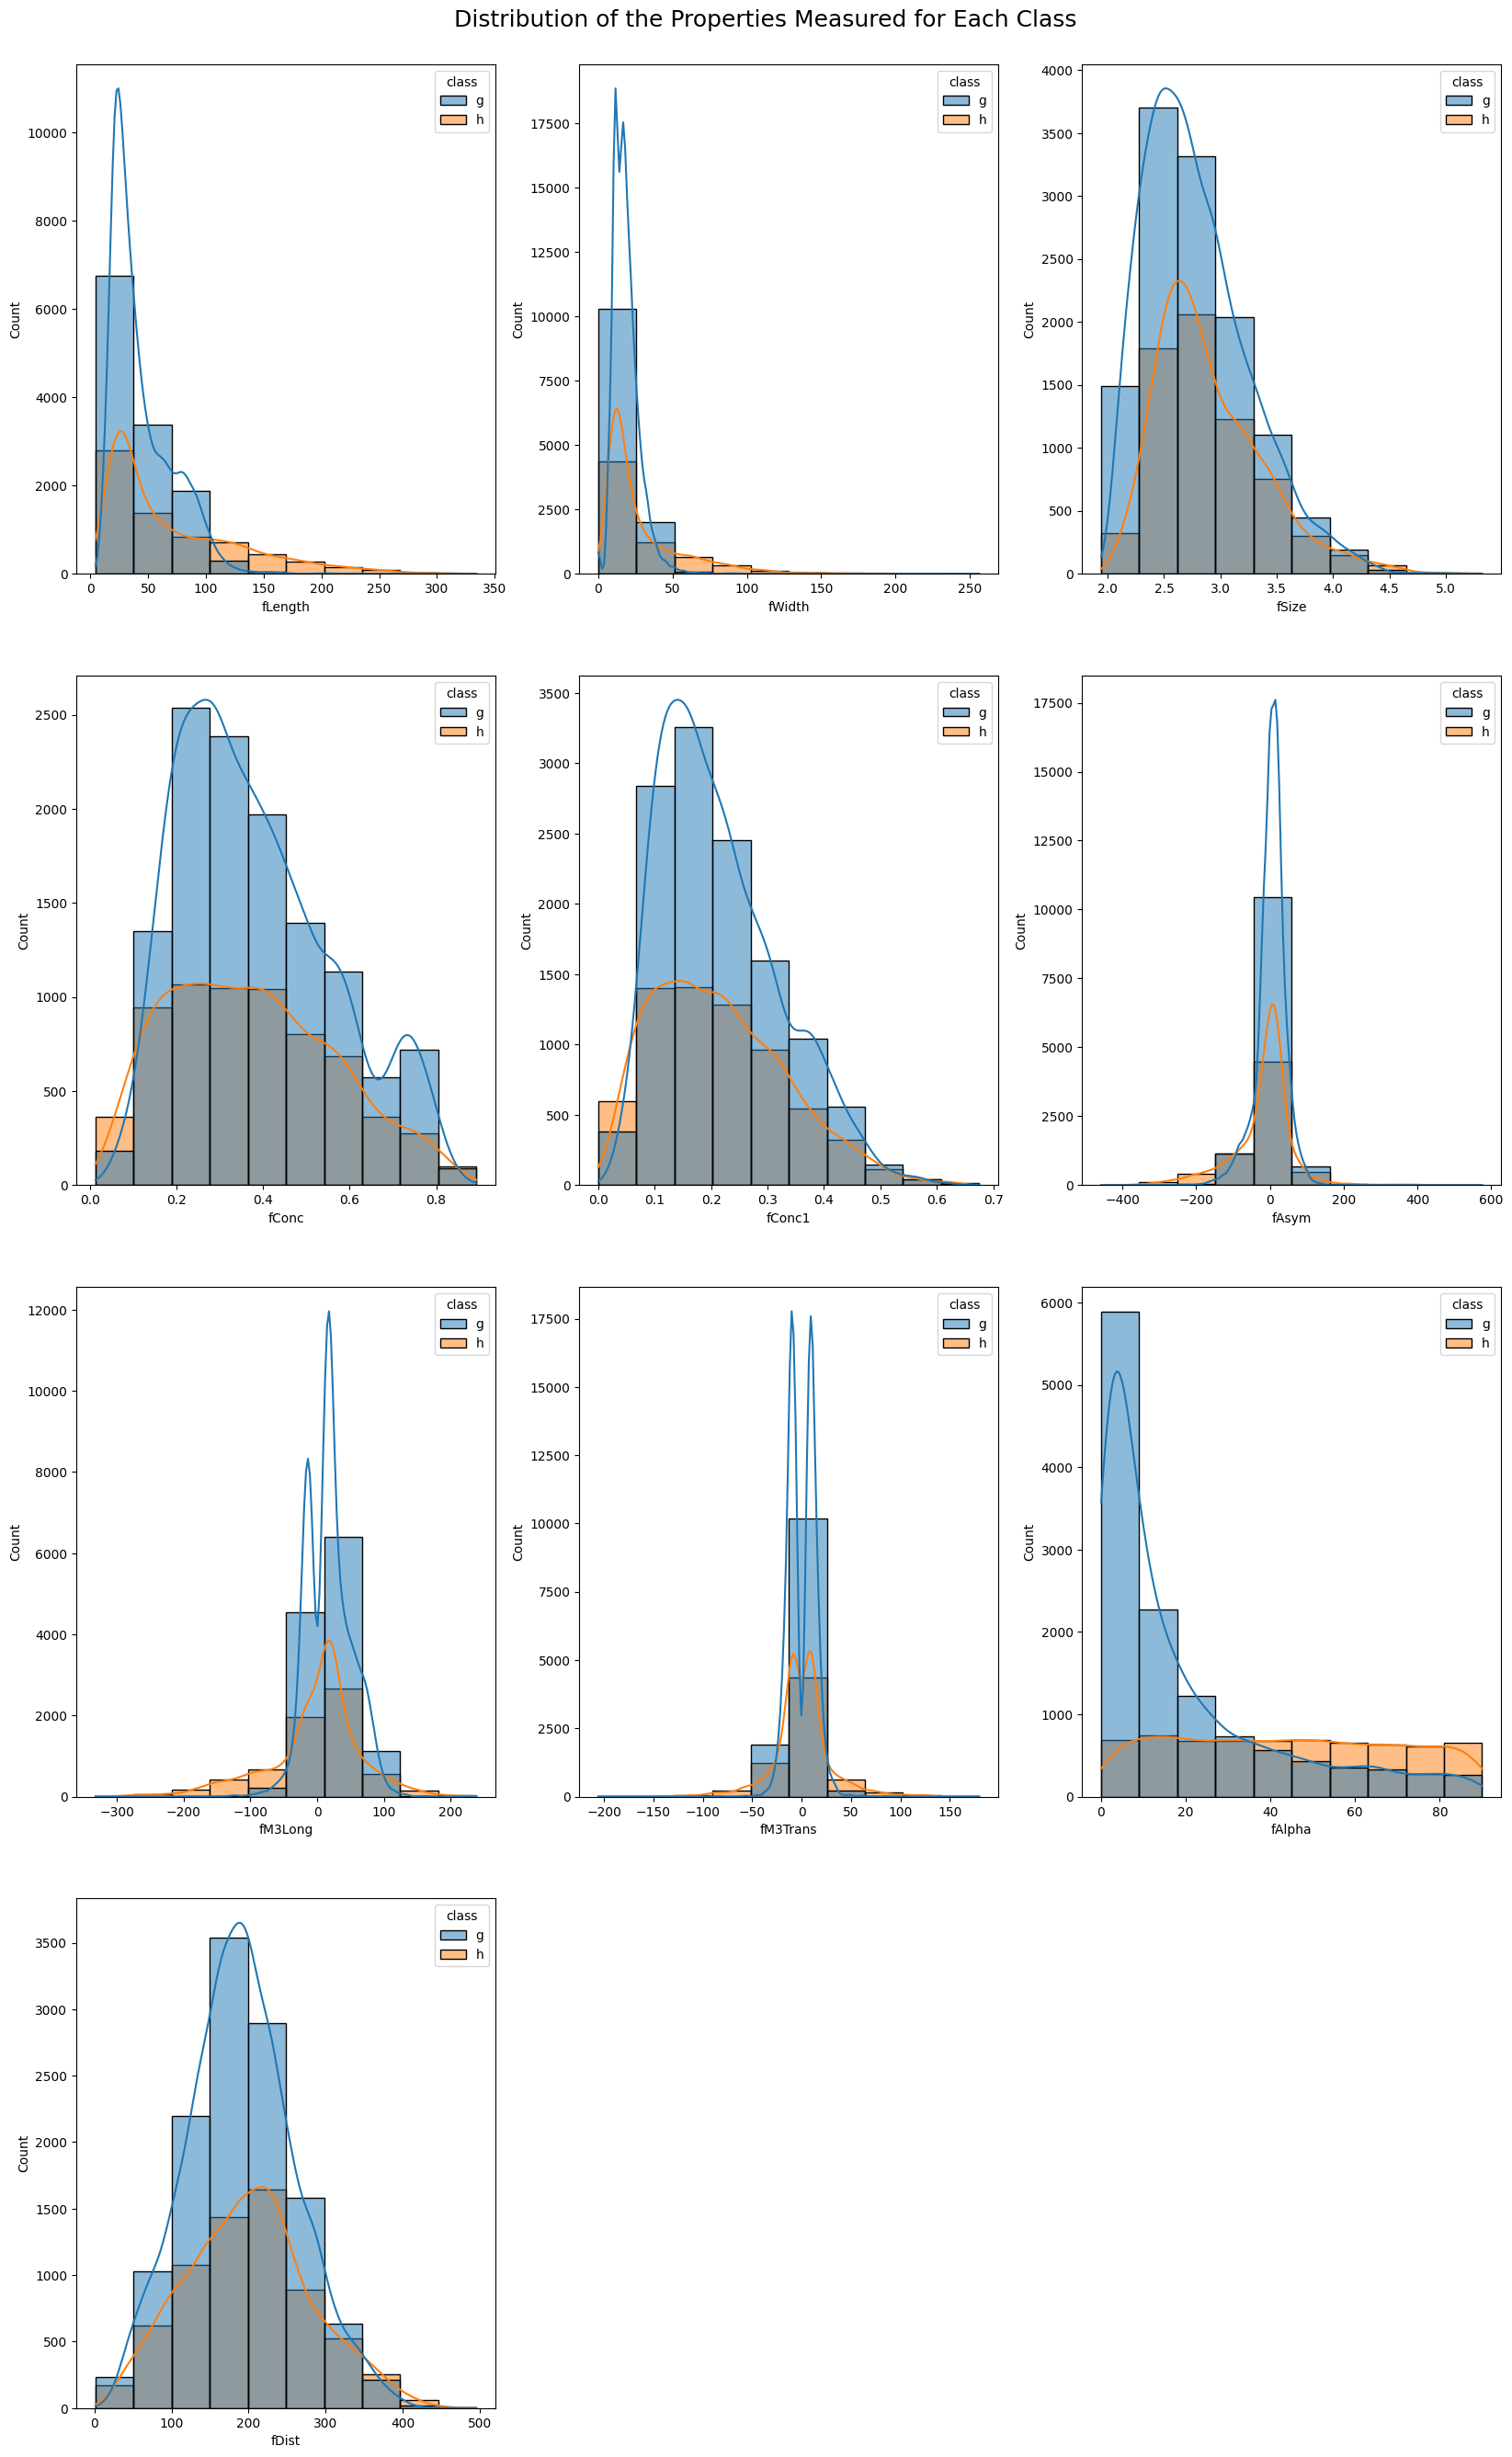

In [ ]:
fig, axs = plt.subplots(4, 3, figsize = (20, 30))
row_nums = [row for row in range(0,4)]
col_nums = [col for col in range(0,3)]
df_cols = [cname for cname in df.columns]

for row_num, i in zip(row_nums, range(0,10,3)):
    for col_num, y in zip(col_nums, range(0,3)):
        if i+y < 10:
            sns.histplot(data=df, x = df_cols[i+y], hue='class', kde= True, ax=axs[row_num, col_num], bins=10 )
fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])
plt.suptitle('Distribution of the Properties Measured for Each Class', fontsize = 18)
plt.subplots_adjust(top=.96)
plt.show()

Data Preproessing for Machine Learning

Creating the Training and Testing Sets

In [ ]:
df_copy = df.copy()
df_copy.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2, random_state=42)
split_sets = split.split(df_copy, df_copy['class'])
for train_set, test_set in split_sets:
    strat_train_set = df_copy.loc[train_set]
    strat_test_set = df_copy.loc[test_set]

In [ ]:
strat_train_set['class'].value_counts()/ len(strat_train_set)

g    0.648396
h    0.351604
Name: class, dtype: float64

In [ ]:
strat_test_set['class'].value_counts()/len(strat_test_set)

g    0.648265
h    0.351735
Name: class, dtype: float64

In [ ]:
X_train = strat_train_set.drop('class', axis=1)
y_train = strat_train_set['class'].copy()

In [ ]:
X_test = strat_test_set.drop('class', axis=1)
y_test = strat_test_set['class'].copy()

Building the Models

In [ ]:
#import all the models to be used

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC

In [ ]:
sgd_model = SGDClassifier(random_state=42)
rf_model  = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
svm_model = SVC(random_state=42)

In [ ]:
model_dict = {'SGD': sgd_model, 'Random Forest': rf_model,
              'K Nearest Neighbor': knn_model, 'Naive Bayes': nb_model,
              'SVM': svm_model}

In [ ]:
#import the metrics to used

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#import cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
#make a function to train the models and perform cross validation

def make_model(model, X_train, y_train, cv=1):
    model.fit(X_train, y_train)
    model_pred = cross_val_predict(model, X_train, y_train, cv = cv)
    return model_pred

In [ ]:
for key in model_dict:
    model_pred = make_model(model_dict[key], X_train, y_train, 5)
    print( key, 'Classification Report', '\n')
    print(classification_report(y_train, model_pred))


SGD Classification Report 

              precision    recall  f1-score   support

           g       0.80      0.83      0.81      9866
           h       0.66      0.61      0.64      5350

    accuracy                           0.75     15216
   macro avg       0.73      0.72      0.72     15216
weighted avg       0.75      0.75      0.75     15216

Random Forest Classification Report 

              precision    recall  f1-score   support

           g       0.88      0.94      0.91      9866
           h       0.87      0.76      0.81      5350

    accuracy                           0.88     15216
   macro avg       0.88      0.85      0.86     15216
weighted avg       0.88      0.88      0.87     15216

K Nearest Neighbor Classification Report 

              precision    recall  f1-score   support

           g       0.80      0.92      0.86      9866
           h       0.79      0.58      0.67      5350

    accuracy                           0.80     15216
   macro avg       

In [ ]:
#make a function that creates ROC graphs

def roc_graphs(model, X_train, y_train, cv=1, model_name='none'):
    if model == sgd_model or model == svm_model:
        model_score = cross_val_predict(model, X_train, y_train,
                                       cv =cv,
                                       method= 'decision_function')
        fpr, tpr, thresholds = roc_curve(y_train, model_score, pos_label='h')

    else:
        model_prob = cross_val_predict(model, X_train, y_train,
                                    cv= cv,
                                    method='predict_proba')
        model_score = model_prob[:,1]
        fpr, tpr, thresholds = roc_curve(y_train, model_score, pos_label='h')

    return plt.plot(fpr, tpr, label = model_name)



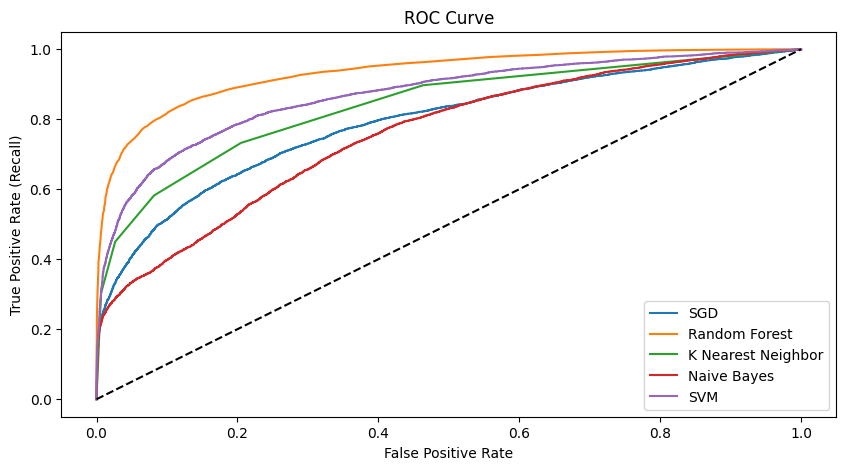

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
for key in model_dict:
    roc_graphs(model_dict[key], X_train, y_train, cv =5, model_name= key)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Fine Tuning the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'n_estimators': [int(n) for n in np.linspace(start=1, stop=100, num=10)],
               'class_weight': ['balanced', 'balanced_subsample'],
               'criterion': ['gini', 'entropy'],
               'max_depth': [int(x) for x in np.linspace(5,50,5)],
               'min_samples_leaf': [int(x) for x in np.linspace(1,10,5)]}
]

grid_search = GridSearchCV(rf_model, param_grid= param_grid, cv=2,
                           scoring='accuracy', return_train_score=True)

Using the Model on the Test Set

In [ ]:
grid_search.fit(X_train, y_train)